In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import arviz as az
from sklearn.linear_model import LogisticRegression
import pymc3 as pm

## The Dataset

You can download the dataset from here: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [2]:
## 1 point

## ToDo: read the csv file into a dataframe and show the first 5 rows
diab_df = pd.read_csv("/Users/yuexuanli/Desktop/Spring2023_Projects/diabetes.csv")
diab_df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
## 3 points

## Assign the Outcome variable to y and the rest to X.
## USe LogisticRegression to fit the data and print out the intercept and the coefficients
from sklearn.preprocessing import StandardScaler

X = diab_df.iloc[:, :-1]
y = diab_df["Outcome"]

scaler = StandardScaler()
X_train = scaler.fit_transform(X)

model = LogisticRegression()
model.fit(X_train,y)
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: [-0.86678294]
Coefficients: [[ 0.40864687  1.10711197 -0.25086804  0.00905046 -0.13083627  0.69630872
   0.30883724  0.17649782]]


In [11]:
## 2 points

## Explain what the code is doing:
## What are the prior probabilities of the intercept and coefficients?
# Which likelihood distribution has been used?
## What does pm.invlogit(linreg) mean?
## What is map_est?

with pm.Model() as logreg_model:
  
    w0 = pm.Normal('w0', mu=0, sd=100)
    w1 = pm.Normal('w1', mu=0, sd=100)
    w2 = pm.Normal('w2', mu=0, sd=100)
    w3 = pm.Normal('w3', mu=0, sd=100)
    w4 = pm.Normal('w4', mu=0, sd=100)
    w5 = pm.Normal('w5', mu=0, sd=100)
    w6 = pm.Normal('w6', mu=0, sd=100)
    w7 = pm.Normal('w7', mu=0, sd=100)
    w8 = pm.Normal('w8', mu=0, sd=100)
   
    
    linreg = w0 * np.ones(diab_df.shape[0]) + w1 * diab_df.Pregnancies.values + w2 * diab_df.Glucose.values \
    + w3 * diab_df.BloodPressure.values + w4 * diab_df.SkinThickness.values + w5 * diab_df.Insulin.values + \
    w6 * diab_df.BMI.values + w7 * diab_df.DiabetesPedigreeFunction.values + w8 * diab_df.Age.values
    p_outcome = pm.invlogit(linreg)

    likelihood = pm.Bernoulli('likelihood', p_outcome, observed=diab_df.Outcome.values)

    
    map_est= pm.find_MAP()
    print(map_est)


{'w0': array(-8.40524686), 'w1': array(0.12315225), 'w2': array(0.03516268), 'w3': array(-0.01329004), 'w4': array(0.00060895), 'w5': array(-0.00119067), 'w6': array(0.08970523), 'w7': array(0.94497011), 'w8': array(0.01488309)}


1. The code shown above is used to predict the probability of weather having diabete based on the features such as pregnancies, glucose level, blood pressure, skin thickness, insulin level, BMI, Diabetes Pedigree Function, and age. The code first defined the prior probabilities of the intercept and coefficients. Then provided a linear regression equation and transformed it to a probability value between 0 and 1 using the logistic function. Lastly, used the maximum a posterior estimate to find the most probable values for the model parameters based on the observed data and prior probabilities.

2. The code defined the prior probabilities of the coefficients and intercept using normal distributions with mean = 0 and standard deviation = 100. Those coefficients are assumed to be independent from each other.

3. The likelihood distribution used here is Bernoulli distribution which predicts the binary outcomes.

4. 'pm.invlogit(linreg)' means the inverse of the logit function to the linear regression. It transforms the linear regression to a probability value between 0 and 1 using the logistic function. 

5. 'map_est' finds the values of the parameters that maximize the posterior probability given the observed data.

/Users/yuexuanli/Desktop/Spring2023_Projects/myenv/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 400 samples in chain.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [w8]
>Metropolis: [w7]
>Metropolis: [w6]
>Metropolis: [w5]
>Metropolis: [w4]
>Metropolis: [w3]
>Metropolis: [w2]
>Metropolis: [w1]
>Metropolis: [w0]
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [w8]
>Metropolis: [w7]
>Metropolis: [w6]
>Metropolis: [w5]
>Metropolis: [w4]
>Metropolis: [w3]
>Metropolis: [w2]
>Metropolis: [w1]
>Metropolis: [w0]


Sampling 4 chains for 1_000 tune and 400 draw iterations (4_000 + 1_600 draws total) took 12 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Got error No model on context stack. trying to find log_likelihood in translation.
/Users/yuexuanli/Desktop/Spring2023_Projects/myenv/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<Axes: title={'center': 'w0'}>, <Axes: title={'center': 'w1'}>,
        <Axes: title={'center': 'w2'}>],
       [<Axes: title={'center': 'w3'}>, <Axes: title={'center': 'w4'}>,
        <Axes: title={'center': 'w5'}>],
       [<Axes: title={'center': 'w6'}>, <Axes: title={'center': 'w7'}>,
        <Axes: title={'center': 'w8'}>]], dtype=object)

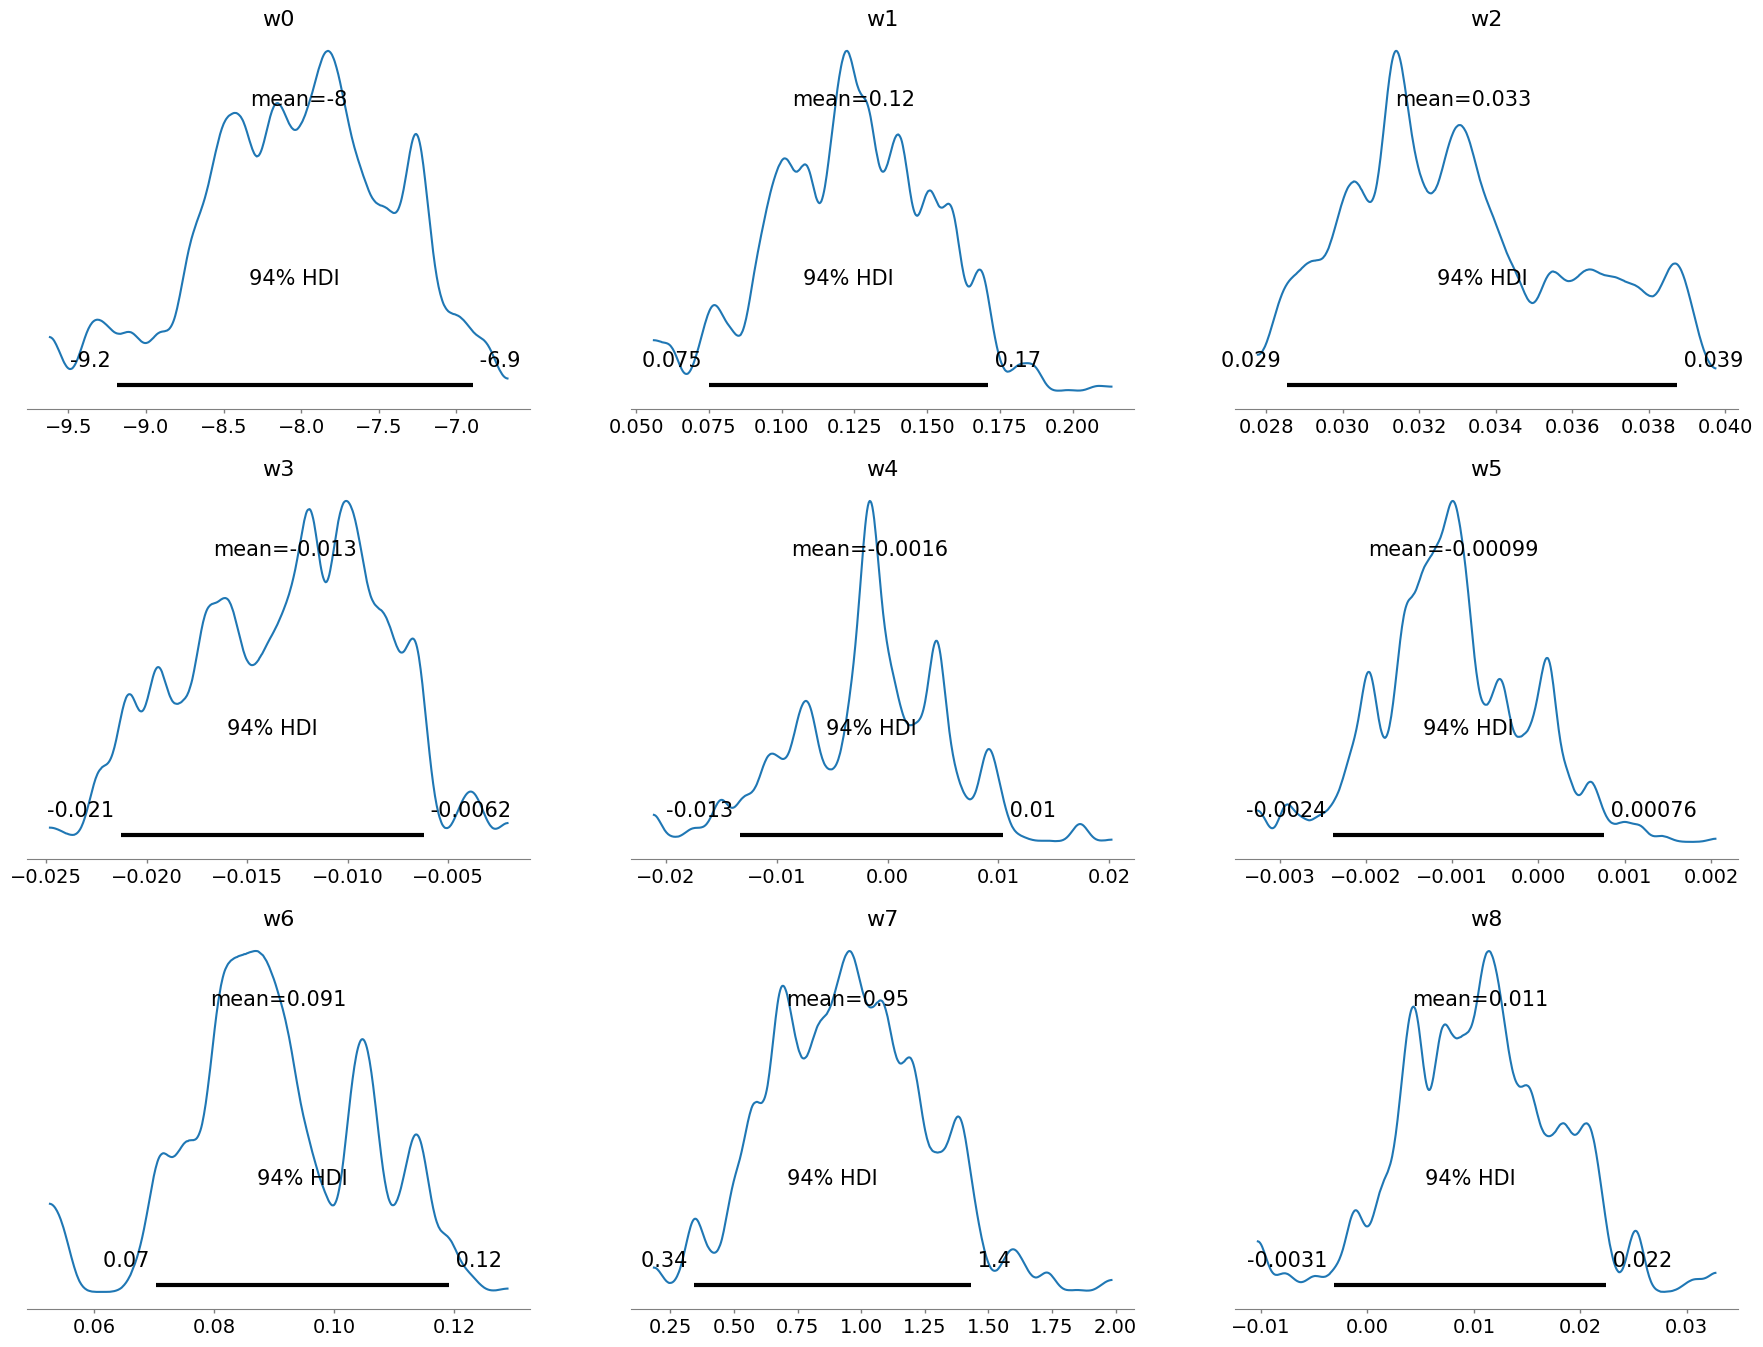

In [14]:
from pymc3 import Metropolis
## 2 points
with logreg_model:
## ToDo: draw 400 samples using pm.Metropolis() and assign to the variable trace    
    trace = pm.sample(draws=400, step=pm.Metropolis())
## Explain the output of the plot 
az.plot_posterior(trace)

'az.plot_posterior(trace)' is used to plot the posterior distribution of the linear regression model 'logreg_model' parameters. Each of them has different mean value and none of them follow the nromal distribution. Those graphs are not well behaved.